In [1]:
# import
import pandas as pd
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import SeasonalAD
from adtk.detector import ThresholdAD
from adtk.detector import QuantileAD
# from adtk.data import to_events

In [2]:
data=pd.read_csv('pressure_data.csv',index_col='Date & Time', parse_dates=True, dayfirst=True)

data_validated=validate_series(data)
#delete columns date and time
data_validated.drop(['Date', 'Time'], axis=1, inplace=True)
#convert NaN to 0
data_validated.fillna(0, inplace=True)
data_validated

,IP - EMF 23,IP - EMF 33,IP - EMF 47,WS01-DMA07-CMP01,WS01-DMA07-CMP 02,WS01-DMA07-CMP 03,WS01-DMA07-CMP04,WS01-DMA07-AZP 01,IF - EMF 23,IF - EMF 33,IF - EMF 47
Date & Time,,,,,,,,,,,
2021-10-01 00:00:00,0.0,0.0,0.0,0.0,0.24,0.49,0.00,0.00,0.0,0.0,0.0
2021-10-01 00:15:00,0.0,0.0,0.0,0.0,0.24,0.49,0.00,0.00,0.0,0.0,0.0
2021-10-01 00:30:00,0.0,0.0,0.0,0.0,0.24,0.49,0.00,0.00,0.0,0.0,0.0
2021-10-01 00:45:00,0.0,0.0,0.0,0.0,0.49,0.73,0.00,0.00,0.0,0.0,0.0
2021-10-01 01:00:00,0.0,0.0,0.0,0.0,0.24,0.49,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-24 07:00:00,0.0,0.0,0.0,0.0,3.41,3.41,2.44,3.90,0.0,0.0,0.0
2021-10-24 07:15:00,0.0,0.0,0.0,0.0,3.41,3.17,2.44,3.66,0.0,0.0,0.0
2021-10-24 07:30:00,0.0,0.0,0.0,0.0,3.17,2.93,2.20,3.66,0.0,0.0,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

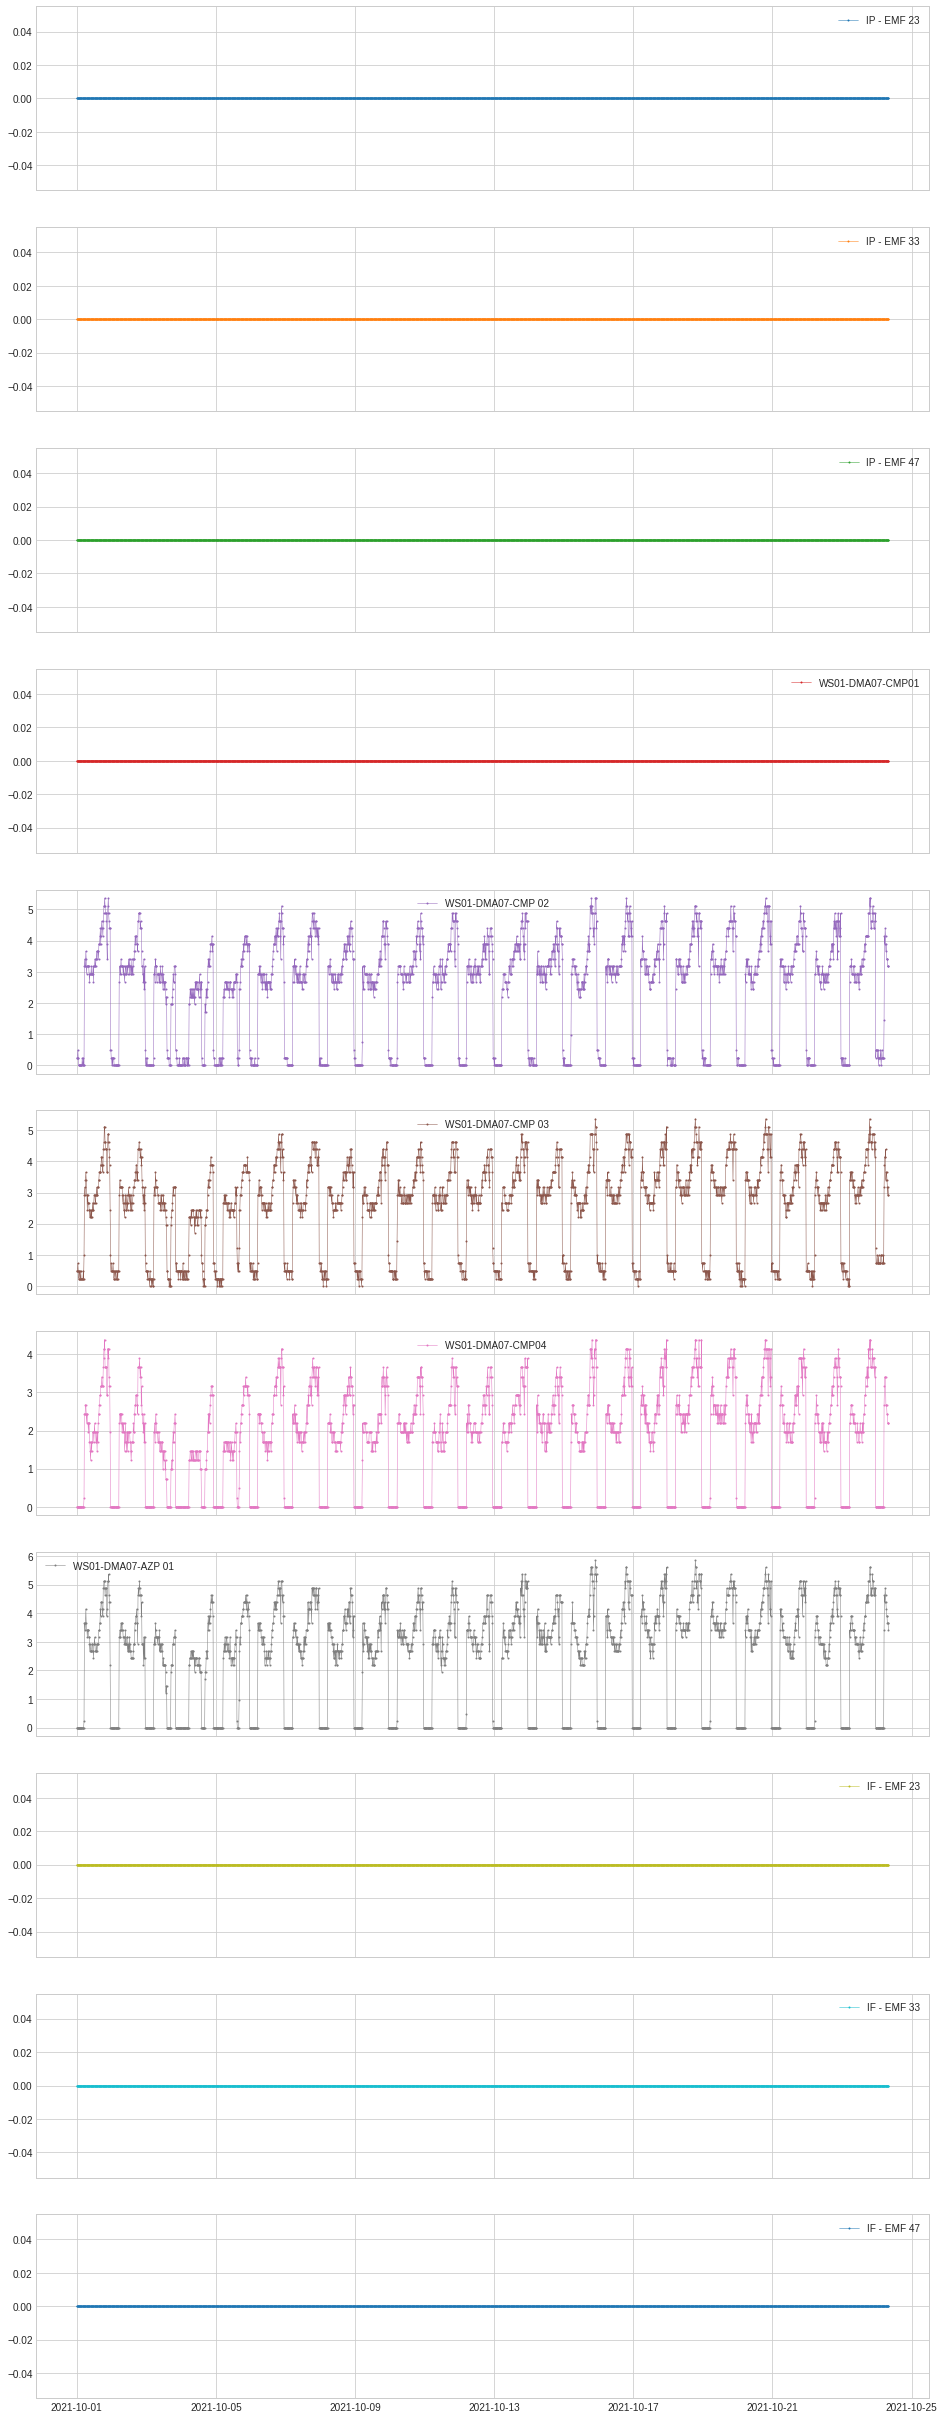

In [3]:
# graph
plot(data_validated)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

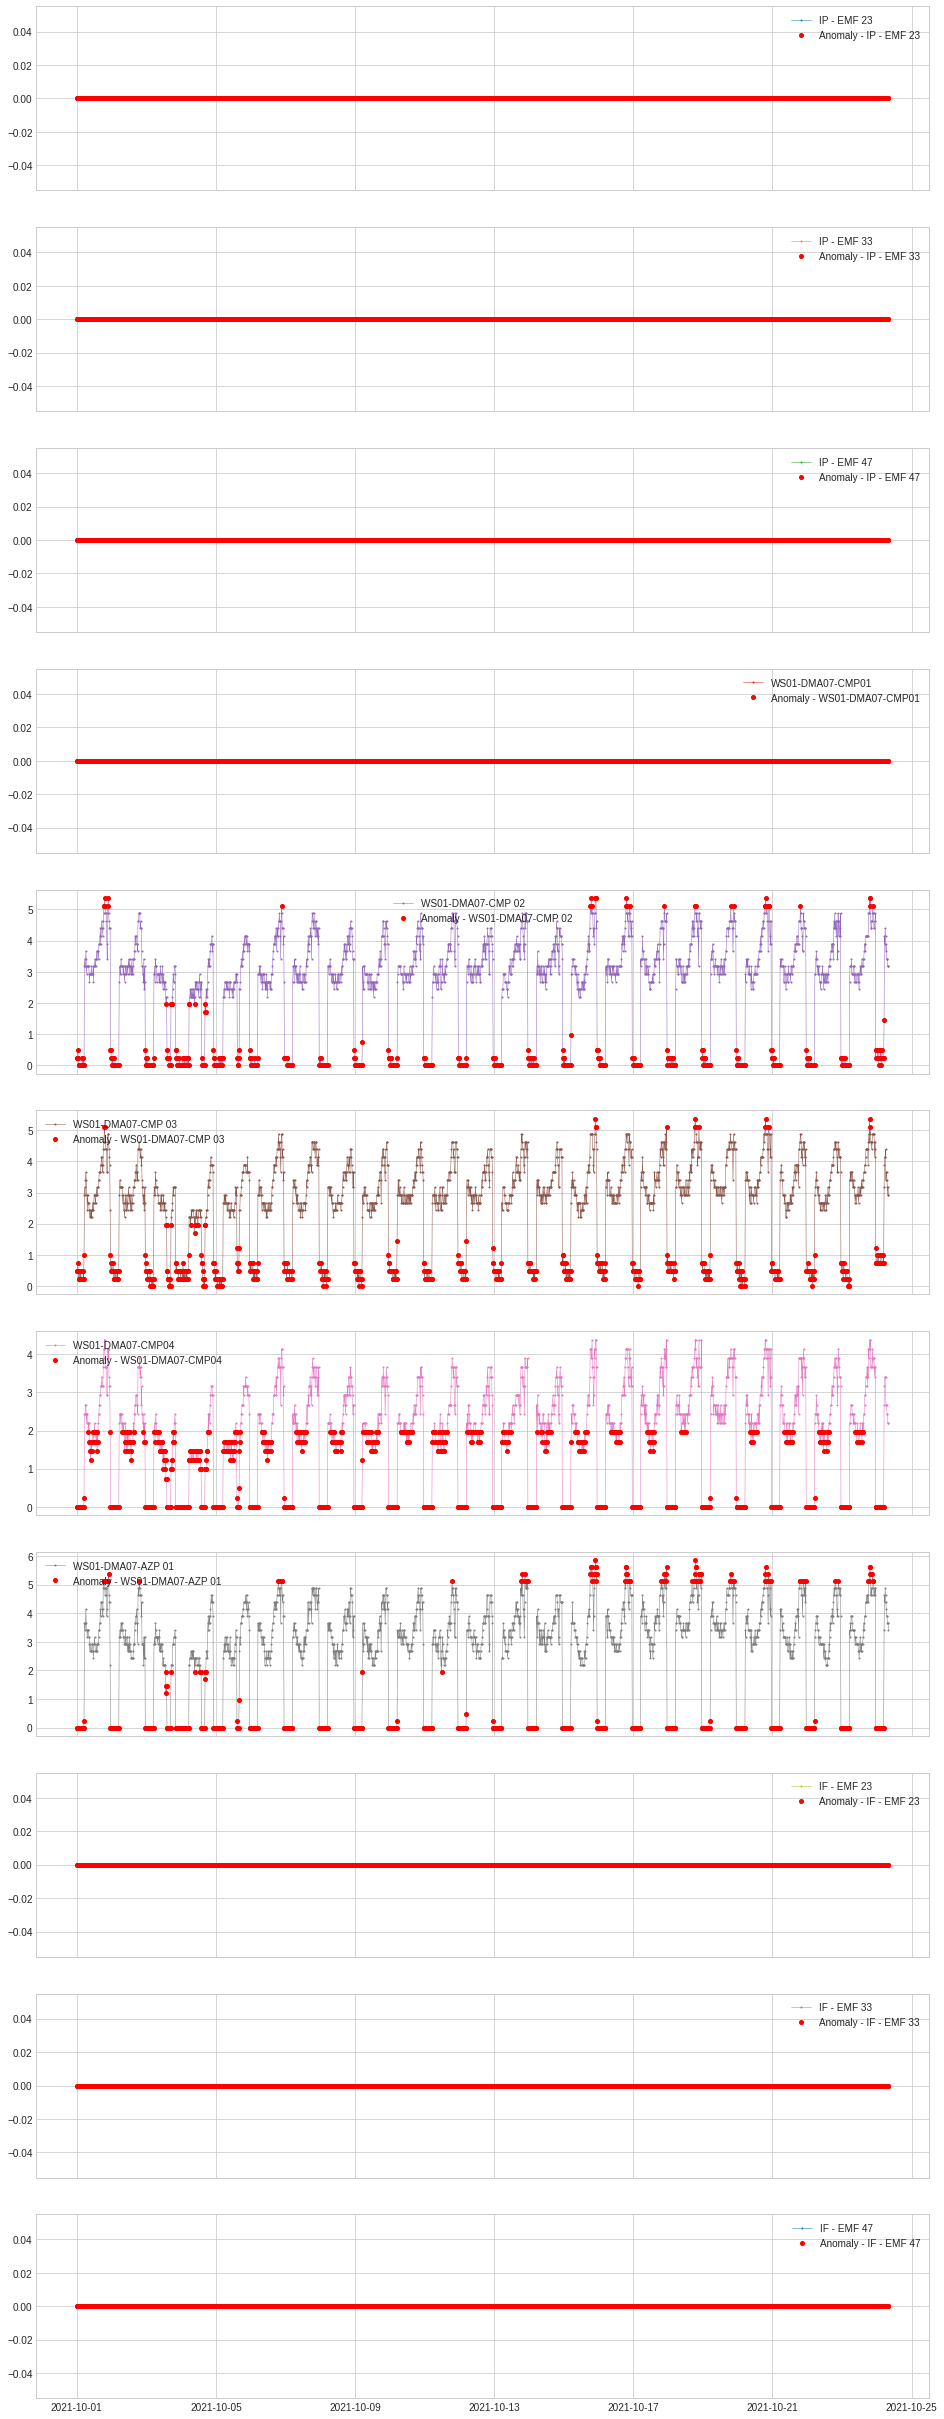

In [4]:
# Threshold AD
threshold_ad = ThresholdAD(high=5, low=2)

anomalies = threshold_ad.detect(data_validated)
plot(data_validated, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

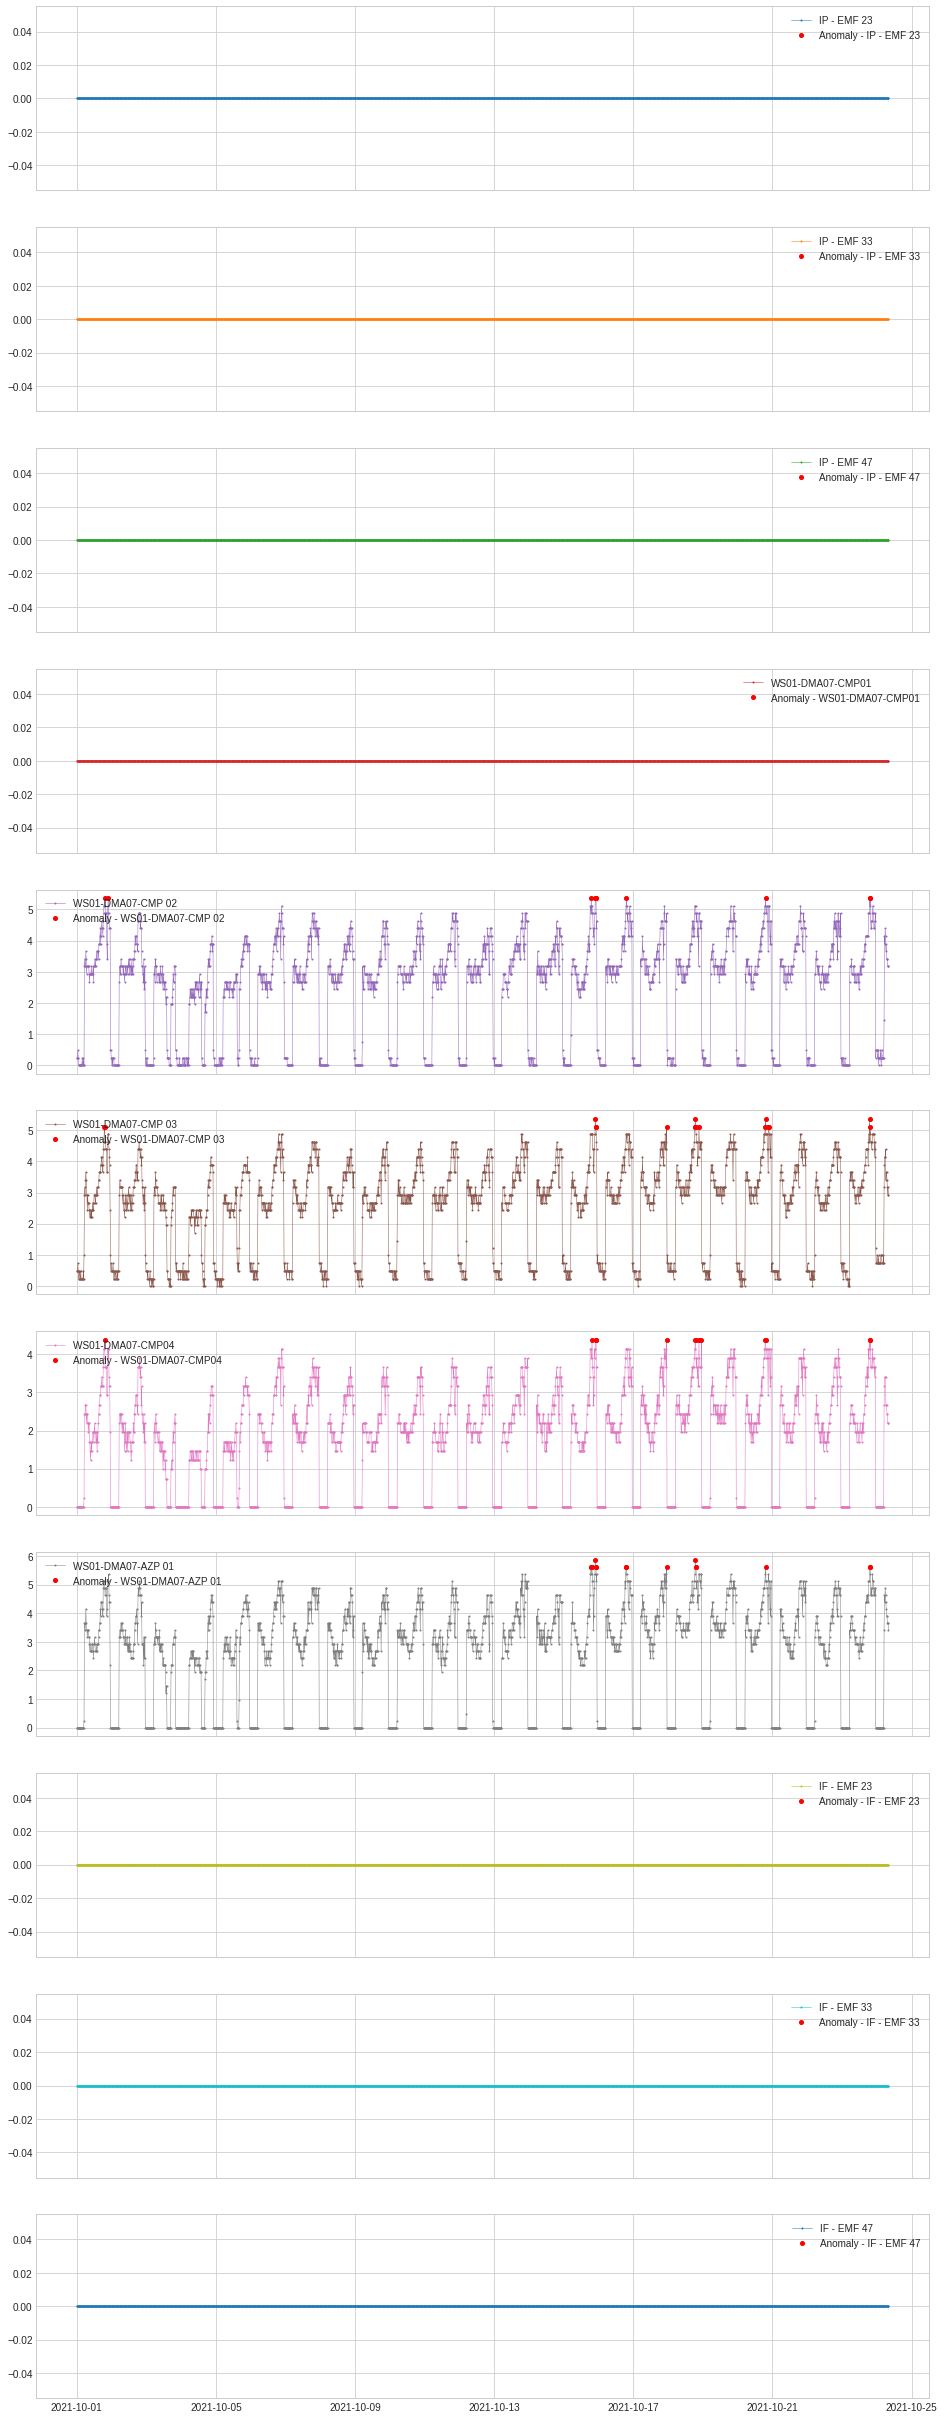

In [5]:
# Quantile AD

quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(data_validated)

plot(data_validated, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

In [6]:
# Seasonal AD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(data_validated)
plot(data_validated, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

/home/zed/.local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


IndexError: index 0 is out of bounds for axis 0 with size 0